## Introduction

Health Insurance costs: Analysing how different factors of individuals affect health insurance costs and predicting health insurance costs.

### 1. Domain-specific area

For this project, I have chosen to work in the area of health insurances. Health insurance are extremely important as medical expenses tend to be high and one might be faced with high expenses in the event of unforeseen accidents. In situations where such high expenses are to be made without prior financial planning, health insurance guides individuals by protecting them from both health and financial risks [1]. 

As such, it is essential to be aware of how health insurances vary from individual to individual. Machine learning is able to aid in determining such insurance coverages and predicting future trends in insurance schemes. Insurance industries also make use of machine learning to outline false claims of insurances [2]. Such uses of machine learning in the insurance industry make way for more accurate insurance coverages, benefitting more individuals in the most suitable way possible.

### 2. Dataset

In order to carry out fundamental machine learning techniques on my chosen area of industry, I have acquired a dataset on charges billed by a health insurance from the following source:

Source of dataset: Miri Choi (2018). Medical Cost Personal Datasets. Retrieved December 24, 2022 from https://www.kaggle.com/datasets/mirichoi0218/insurance

I have taken this dataset from Kaggle [3] which is an open sourced site for users to find or publish datasets.

The dataset contains data on 1338 individuals. Factors regarding these individuals in the dataset are as follows: 
- Age (of primary beneficiary)
- Gender 
- BMI (Body Mass Index)
- Children (number of children/dependents)
- Smoker (whether they are a smoker or not)
- Region (the beneficiary's residential area in the US, northeast, southeast, southwest, northwest)
- Charges (individual medical costs billed by health insurance)

All factors mentioned above are recorded in numerical form, except gender, smoker and region. Data in these factors are recorded as a string.

This dataset is appropriate for my project as the factors included in the dataset are common factors of individuals when applying for any typical health insurance [4]. Hence, I will be working on this dataset for the project.

### 3. Objectives of project

For this project, I aim to explore the factors of individuals recorded in my chosen dataset and build a regression model to predict health insurance costs based on these factors. The results of my regression model would indicate how accurate my model was in predicting health insurance costs.

## Implementation

### 1. Preprocessing

I will now import relevant libraries and modules for this project and load the dataset.

In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import csv

In [2]:
# load data
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Hereafter, I will preprocess the dataset according to the scope of this project.

The following code shows the data types of values in each column.

In [3]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Some columns (sex, smoker, and region) have non-numerical data, in contrast to the other columns. In order to maintain uniformity in data types for easier analysis, I will map numerical data to these string values.

Addressing the sex column first, I will look for unique colours recorded throughout the dataset.

In [4]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

I will then manually assign the values to an integer.

In [5]:
df = df.replace(['female'], 1)
df = df.replace(['male'], 2)
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,2,33.770,1,no,southeast,1725.55230
2,28,2,33.000,3,no,southeast,4449.46200
3,33,2,22.705,0,no,northwest,21984.47061
4,32,2,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,2,30.970,3,no,northwest,10600.54830
1334,18,1,31.920,0,no,northeast,2205.98080
1335,18,1,36.850,0,no,southeast,1629.83350
1336,21,1,25.800,0,no,southwest,2007.94500


Similarly, I will now address the smoker and region column by mapping the values to numbers for simplicity purposes.

In [6]:
print(df['smoker'].unique())
print(df['region'].unique())

['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [7]:
df = df.replace(['yes'], 1)
df = df.replace(['no'], 2)

df = df.replace(['southwest'], 1)
df = df.replace(['southeast'], 2)
df = df.replace(['northwest'], 3)
df = df.replace(['northeast'], 4)

df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,2,33.770,1,2,2,1725.55230
2,28,2,33.000,3,2,2,4449.46200
3,33,2,22.705,0,2,3,21984.47061
4,32,2,28.880,0,2,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,2,30.970,3,2,3,10600.54830
1334,18,1,31.920,0,2,4,2205.98080
1335,18,1,36.850,0,2,2,1629.83350
1336,21,1,25.800,0,2,1,2007.94500


All columns in the dataset now have numerical values as seen below.

In [8]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

##### Outliers

Lastly, I will look for extrapoly values in columns such as age and BMI to ensure there are no outlier values that may affect the costs billed by health insurance.

<AxesSubplot:>

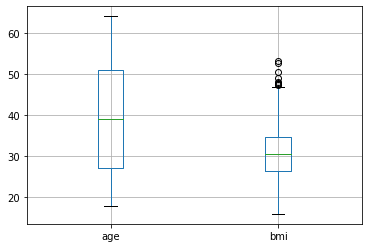

In [9]:
df.boxplot(column=['age', 'bmi'])

The above boxplot shows that there are no outliers values for age and some clustered outliers for BMI. Although the cluster in outside the general range of BMIs, I will not consider it as outliers for this project as they are rather close to the general spread. Hence, no outliers can be found in the dataset.

That concludes my preprocessing of the dataset. The dataset originally obtained from the open source was already normalised into the First Normal Form (1NF). Each column and each row in the dataset only contain atomic values. Hence no further normalisation was required.

I have carried out the above steps to preprocess the dataset in order to change all data types in the dataset to numerical form. This is ensure the dataset that will be used to build the regression model is in numerical form.

The dataset is in comma-separated values (CSV) which records data in a table-structured format.

### 2. Statistical summary

For the statistical analysis of the dataset, I will present the measures of central tendency, spread and type of distribution observed in the dataset.

The following shows a summary of the number of non-empty values, mean, standard deviation, minimum, 25th percentile, 50th percentile, 75th percentile and maximum value in each column of the dataset.

As such, the mean, median and standard deviation summary of the dataset are seen in the table below.

In [10]:
# measures of central tendency and spread
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,1.505232,30.663397,1.094918,1.795217,2.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,1.000000,15.960000,0.000000,1.000000,1.000000,1121.873900
25%,27.000000,1.000000,26.296250,0.000000,2.000000,2.000000,4740.287150
50%,39.000000,2.000000,30.400000,1.000000,2.000000,2.000000,9382.033000
75%,51.000000,2.000000,34.693750,2.000000,2.000000,3.000000,16639.912515
max,64.000000,2.000000,53.130000,5.000000,2.000000,4.000000,63770.428010


The most prevalent values in each column are shown using the mode() function as seen below:

In [11]:
# mode
df.mode()

,age,sex,bmi,children,smoker,region,charges
0,18,2,32.3,0,2,2,1639.5631


The skewness and kurtosis of each feature can help us understand the distribution of the features in the dataset better. Skewness of a feature would indicate how much it deviates from its mean value on a scale of its distribution. Kurtosis of a feature tells us how often outliers occur in the data.

In [12]:
print('Skewness')
df.skew()

Skewness


age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker     -1.464766
region      0.038101
charges     1.515880
dtype: float64

In [13]:
print('Kurtosis')
df.kurt()

Kurtosis


age        -1.245088
sex        -2.002557
bmi        -0.050732
children    0.202454
smoker      0.145756
region     -1.327702
charges     1.606299
dtype: float64

From the statistical summary of the dataset above, we can get a gist of how distributed and spread the data values are. This information can help us better understand the dataset when visualising the data in the following part of this project.

### 3. Data Visualisation

For the data visualisation part of this project, I will visualise the dataset in the following ways:
- Distribution of charges across all ages and bmi levels
- Density of charges for genders, no. of children, smoker types, and regions.

##### Distribution of charges across all ages

/Users/rajasuvedhavivekanandan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


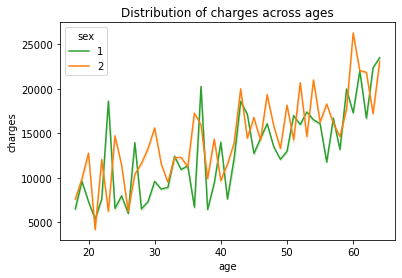

In [14]:
colours = ['tab:green', 'tab:orange']
sns.lineplot(df["age"], 
             df["charges"], 
             hue = df["sex"], 
             ci=0, 
             palette = colours).set(title = 'Distribution of charges across ages')
plt.legend=('female', 'male')
plt.show()

The line graph above shows how the charges billed by health insurance varied over the age of the primary beneficiary. There are no extremity observed as there is a general increase in charges billed as primary beneficiary's age increases for both genders.

##### Distribution of charges across BMI levels

<AxesSubplot:xlabel='bmi', ylabel='charges'>

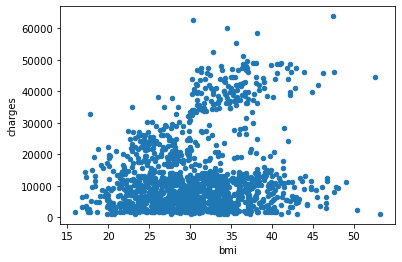

In [15]:
df.plot.scatter(x = "bmi", y = "charges")

The above scatter plot shows how the charges billed by health insurance varies over the BMI levels. It can be seen that all BMI levels have a generally same amount of charges billed by the insurance (ranging from 0 - 30k). It is notable that BMI levels of 30 to 45 also have higher values of charges compared to BMI of other levels.

##### Density of charges for each gender

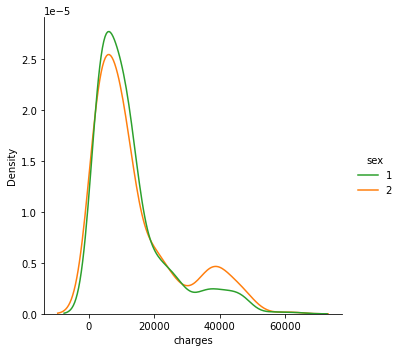

In [16]:
colours = ['tab:green', 'tab:orange']
sns.displot(x = df['charges'], hue = df['sex'], palette = colours, kind='kde')

The displot above shows that there is not much difference in the charges billed by health insurance for females and males. Most females and males have charges within the range of 0 to 20k billed by health insurance. It is also notable that more males have charges of 40k billed by health insurance as compared to females. In general, the displot shows that there is no significant difference in the way medical costs are billed by health insurances for females and males.

##### Density of charges for varying number of children

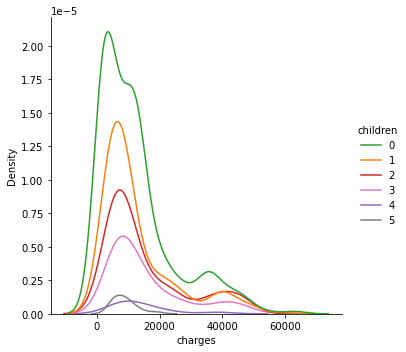

In [17]:
colours = ['tab:green', 'tab:orange', 'tab:red', 'tab:pink', 'tab:purple', 'tab:grey']
sns.displot(x = df['charges'], hue = df['children'], palette = colours, kind='kde')

The displot above shows that regardless of the number of children/dependents covered by the health insurance, most individuals have the same amount of charges billed by the insurance (ranging from 0 to 20k). (The difference in peak simply means that there are more beneficiaries with lesser children in the dataset, as show in the pie chart below)

<AxesSubplot:ylabel='children'>

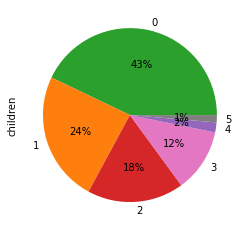

In [18]:
df['children'].value_counts().plot(kind='pie', 
                                    labels = ['0', '1', '2', '3', '4', '5', '6'], 
                                    colors = colours,
                                    autopct = '%1.0f%%')

##### Density of charges for each smoker type

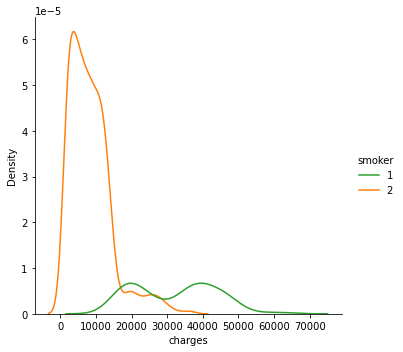

In [19]:
colours = ['tab:green', 'tab:orange']
sns.displot(x = df['charges'], hue = df['smoker'], palette = colours, kind='kde')

The displot above shows that most non-smokers have lower charges billed by the insurance (ranging from 0 to 15k) while smokers have higher charges billed by the insurance.

##### Density of charges in each region

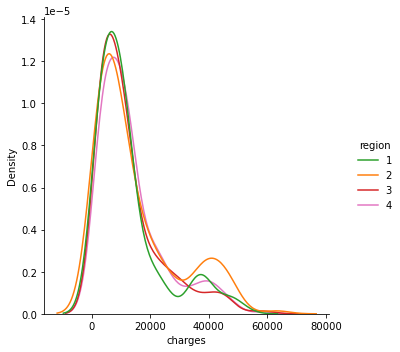

In [20]:
colours = ['tab:green', 'tab:orange', 'tab:red', 'tab:pink']
sns.displot(x=df['charges'], hue=df['region'], palette=colours, kind='kde')

The displot shows that the beneficiaries' residential areas do not affect the charges they will be billed by the insurance. Beneficiaries across all regions mostly have the same amount of charges billed by the insurances ranging from 0 to 20k.

##### Overall visualisation

I've used a pairplot such as the one below to visualise all factors against each other.

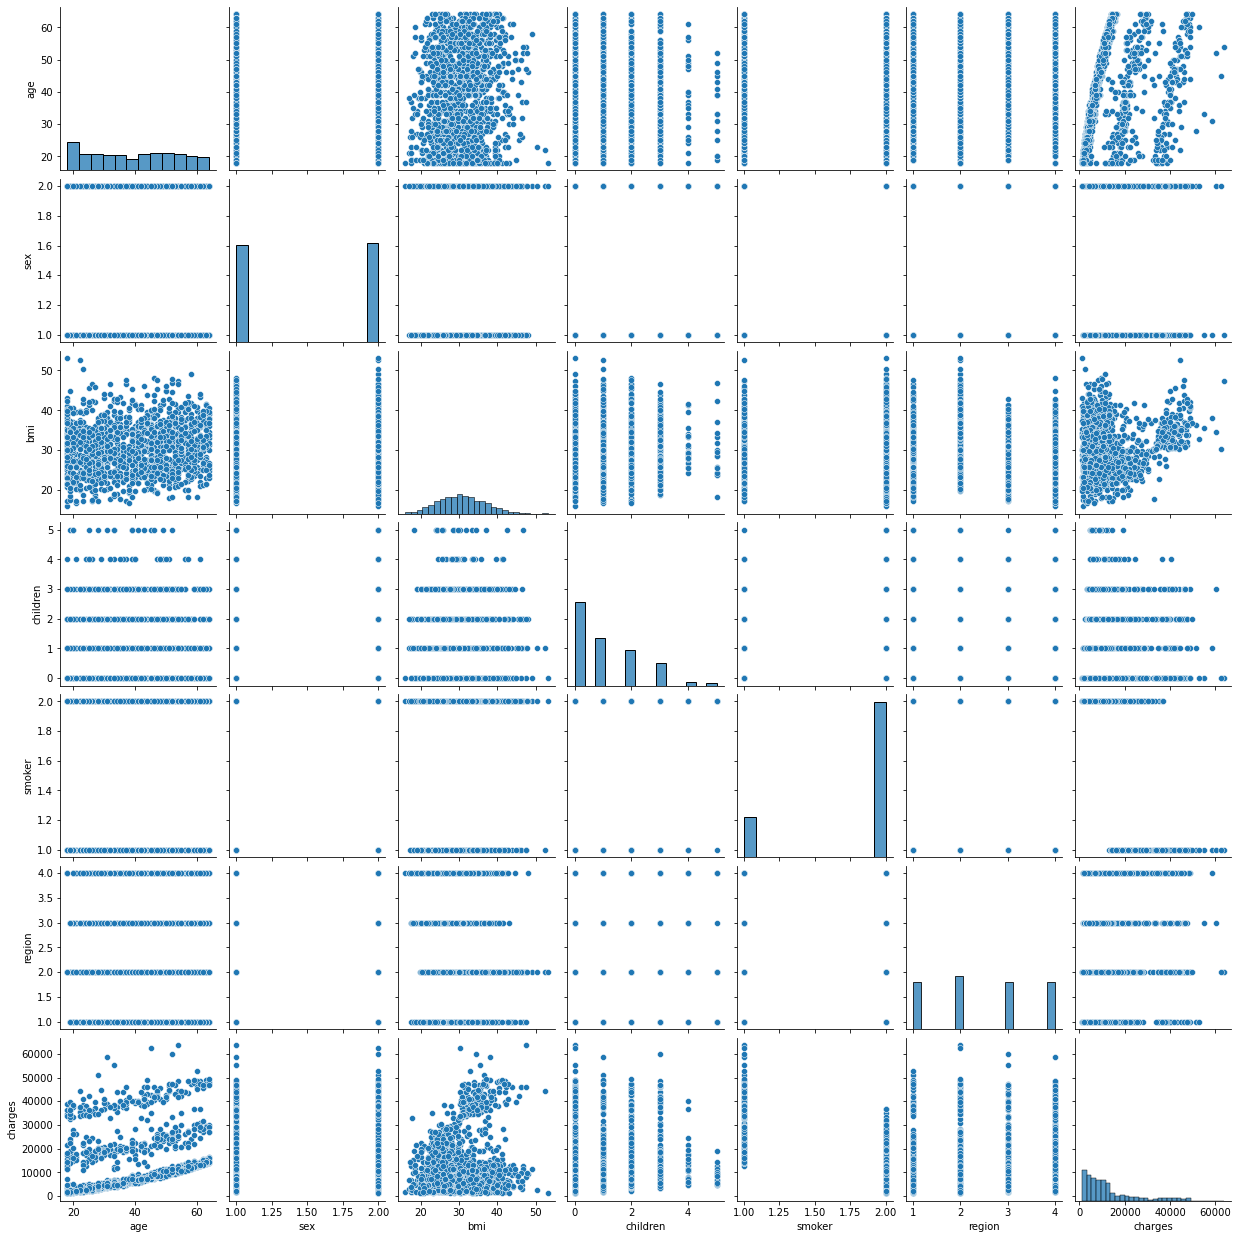

In [51]:
sns.pairplot(df)

##### Data visualisation summary

From the brief visualisations above, we can obtain a general idea of which features from the dataset affect the charges billed by the health insurance. We can notice that out of the 6 factors against charges, age, bmi and smoke type had significant effect of charges billed by the health insurance.

### 4. Machine Learning model

#### Identifying features and labels used in the data regression model

Since my objectives of the project is to predict health insurance costs, I have initiated 'bmi' as independent variable while having 'charges' as dependent variable. I have chose BMI as the independent factor as it had more significant impact in the variations of charges as seen in the data visualisation above.

In [178]:
# independent features
X = df.drop('charges', axis = 1)
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,2,33.770,1,2,2
2,28,2,33.000,3,2,2
3,33,2,22.705,0,2,3
4,32,2,28.880,0,2,3
...,...,...,...,...,...,...
1333,50,2,30.970,3,2,3
1334,18,1,31.920,0,2,4
1335,18,1,36.850,0,2,2
1336,21,1,25.800,0,2,1


In [179]:
y = df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

#### Split data into training and testing set

In [239]:
from sklearn.model_selection import train_test_split

# split data with 20% of data in testing set, rest in training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

#### Linear regression

I have chosen to do a linear regression analysis to predict the health insurance costs as I aim to see how the other factors play a role in the charges billed by the health insurance.

In [240]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# fit and train model
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)

# predict for test set
linearModel_pred = linearModel.predict(X_test)

In [241]:
# display intercept
print(linear.intercept_)

1252.9086131663826


In [242]:
# display slope
print(linear.coef_)

[391.88180398]


In [243]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MSE = mean_squared_error(y_test, linearModel_pred)
RMSE = np.sqrt(mean_squared_error(y_test, linearModel_pred))
MAE = mean_absolute_error(y_test, linearModel_pred)

pd.DataFrame([MSE, RMSE, MAE],
            index = ['MSE', 'RMSE', 'MAE'],
            columns = ['Metrics'])

# linearModel_acc = r2_score(y_test, linearModel_pred) * 100

,Metrics
MSE,3.548066e+07
RMSE,5.956565e+03
MAE,4.056118e+03


#### Decision trees

To better analyse my regression model, I will choose one more machine learning approach to compare with the linear regression algorithm I have done above. Decision trees have a tree structure where decisions are made hierarchically with the reference to the different factors. Hence, when predicting health insurance costs based on the other factors, a decision tree is able to accurately come to conclusions.

In [244]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# fit and train model
decTree = DecisionTreeRegressor()
decTree.fit(X_train, y_train)

# predict for test set
decTree_pred = decTree.predict(X_test)

In [245]:
#
MSE = mean_squared_error(y_test, decTree_pred)
RMSE = np.sqrt(mean_squared_error(y_test, decTree_pred))
MAE = mean_absolute_error(y_test, decTree_pred)

pd.DataFrame([MSE, RMSE, MAE],
            index = ['MSE', 'RMSE', 'MAE'],
            columns = ['Metrics'])

# decTree_acc = r2_score(y_test, decTree_pred) * 100

,Metrics
MSE,4.143734e+07
RMSE,6.437184e+03
MAE,3.078826e+03


## Conclusions

### 1. Results of the ML model

In the regression model built above, I have chosen 2 machine learning approaches to analyse and compare their performances when predicting health insurance costs. The metrics (MSE, RMSE, and MAE) of each algorithm has been tabulated above. I will use these and the r2 score to compare the two algorithms.

In [246]:
pd.DataFrame([linearModel_acc, decTree_acc], 
             index=['Linear Regression', 'Decision Trees'], 
             columns=['Accuracy'])

,Accuracy
Linear Regression,74.036772
Decision Trees,72.701169


As seen above, linear regression performed better than decision trees as it has a higher percentage of accuracy. 

In terms of the root mean squared error (RMSE) of the two approaches, both RMSE values are high. RMSE values are the differences between charges predicted by my model and the actual charges billed by the health insurance. In the case of linear regression and decision trees, both approaches have high values of errors. However, this can be reduced when I improve on my model in the future with a larger dataset. Comparing the two RMSE values, we can conclude that linear regression has a lower RMSE value than that of decision trees. Linear regression in my model produced lesser error than decision tree.

My regression model compared two machine learning approaches to predict health insurance costs and concluded that linear regression was a more accurate algorithm than decision trees.

In summary, my model was able to predict health insurance costs with 74% accuracy. With this, insurance industries can predict appropriate health insurance schemes for their customers while preventing fraudulent claims for higher insurance costs.

[233 words]

### 2. Evaluation of the project and its results

In summary, I believe the regression model I have built above can be used to predict health insurance costs in the future with a larger and more diverse dataset on individuals. The results of the model in this project are decent and applicable for other forms of dataset. Insurance industries could adapt and upgrade from my regression model to look out for false claims of insurance costs and shape schemes for a wider range of customers. 

My regression model can be easily adapted into other areas of industry or science to predict respective factors. There are various other methods of carrying out the above implemented linear regression and decision trees. For instance, a linear regression algorithm can be implemented using the R programming language, with its features of data cleaning and statistical tools. In addition, I have used SciKit Learn for this project to implement the ML approaches. Given other scenarios, my model could also be built using the Weka library. As I have used linear regression and decision tree for this project, other ML approaches could be used to build a similar model as well. For instance, random forest regression could be used to combine the predictions of multiple regressors to produce a more accurate deduction. It is flexible with categorical and continuous types of values. However, it can be slow as it combines multiple algorithms before making predictions. This can be ineffective in the face of real-time applications where instant predictions are required.

As such, the regression model built in this project have produced decent results, making way for more improvements with the use of diverse datasets.

[269 words]

## References

[1] - Healthcare.gov. Available from: https://www.healthcare.gov/why-coverage-is-important/coverage-protects-you/

[2] - Capital Law. Available from: https://www.capitallaw.co.uk/news/2021/03/26/how-are-ai-and-machine-learning-used-in-insurance/

[3] - Kaggle. Available from: https://www.kaggle.com/

[4] - April International. Available from: https://aplusii.com/top-7-factors-affecting-your-medical-insurance-policy/